## LOAN DEFAULT DATA 

##### Importing Neccessary Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the Loan Data csv file and naming it "df"

In [2]:
df = pd.read_csv(r"C:\Users\WINDOWS\Desktop\VScode_Projects\Loan_default.csv")
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


## Data Preprocessing and Data Cleaning

##### Checking Dataset Properties

In [3]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [4]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [5]:
df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


## Exploratory Data Analysis

##### 1. Analyze loan default rates across different customer demographics

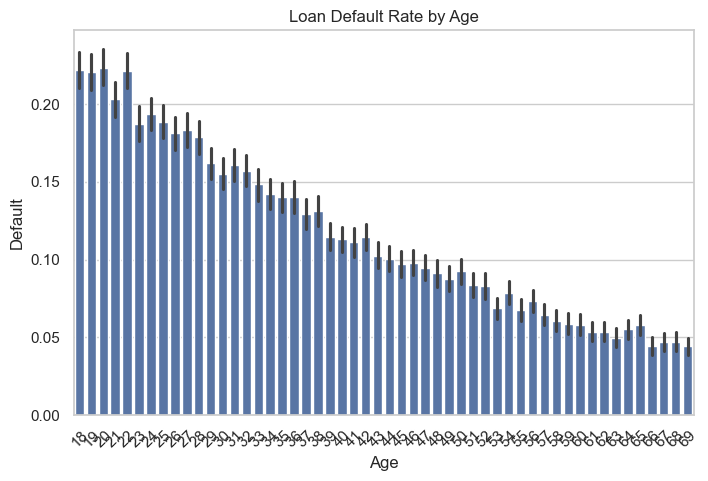

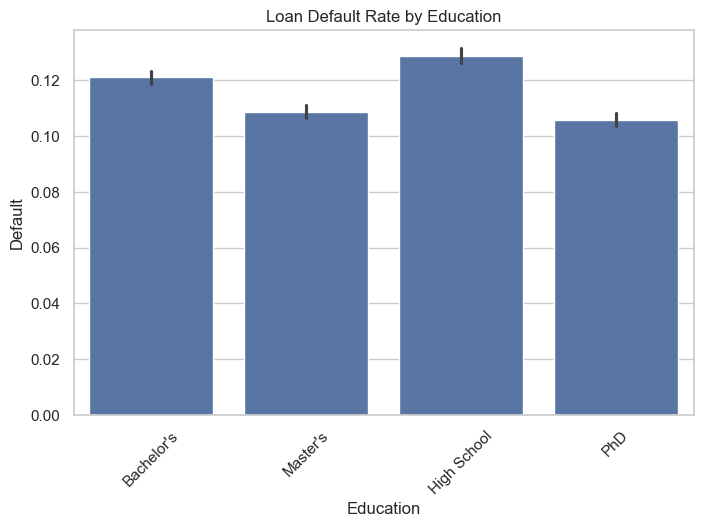

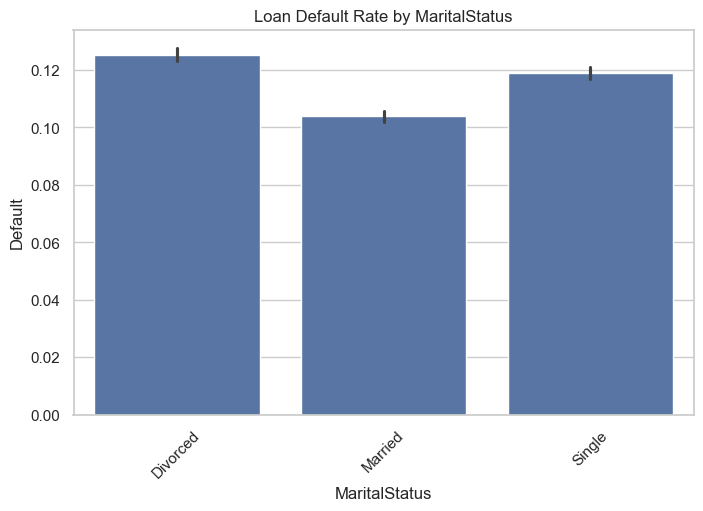

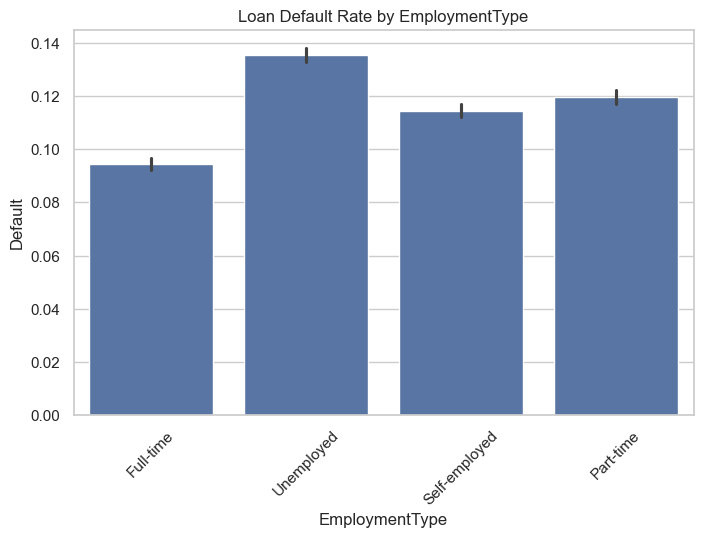

In [6]:
sns.set(style="whitegrid")
demographic_factors = ['Age', 'Education', 'MaritalStatus', 'EmploymentType']
for factor in demographic_factors:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=factor, y='Default', data=df, estimator=lambda x: sum(x)/len(x))
    plt.title(f'Loan Default Rate by {factor}')
    plt.xticks(rotation=45)
    plt.show()

 #####  2.Identify factors influencing loan repayment, such as income level, business type, and location

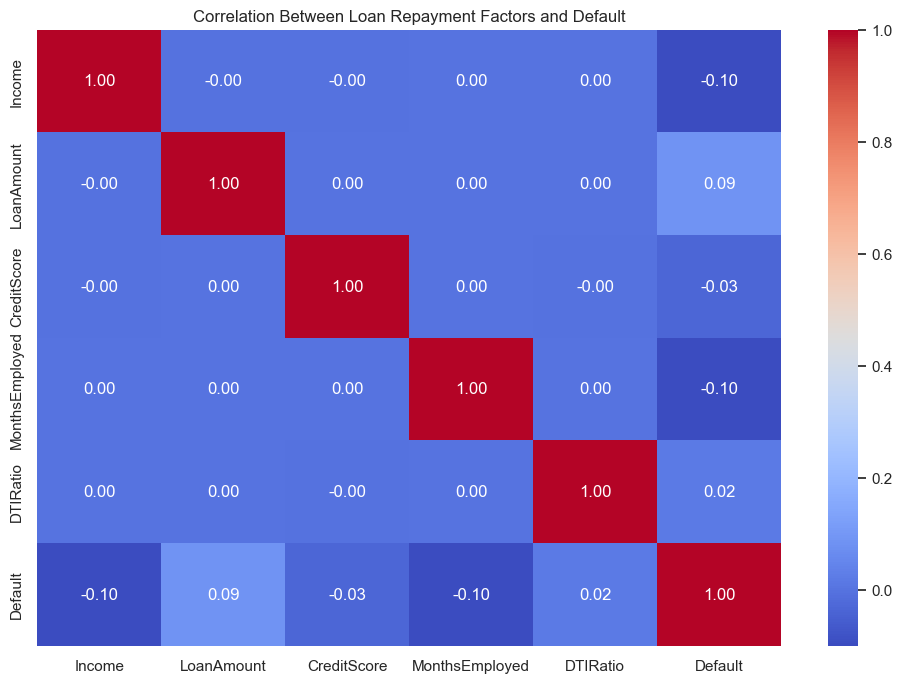

In [9]:
factors = ['Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'DTIRatio']
plt.figure(figsize=(12, 8))
sns.heatmap(df[factors + ['Default']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Loan Repayment Factors and Default')
plt.show()

##### Trends over time in loan defaults (assuming LoanTerm can be used as a proxy for time)

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_1248\296448389.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_trend = df.groupby('LoanTerm_Group')['Default'].mean()


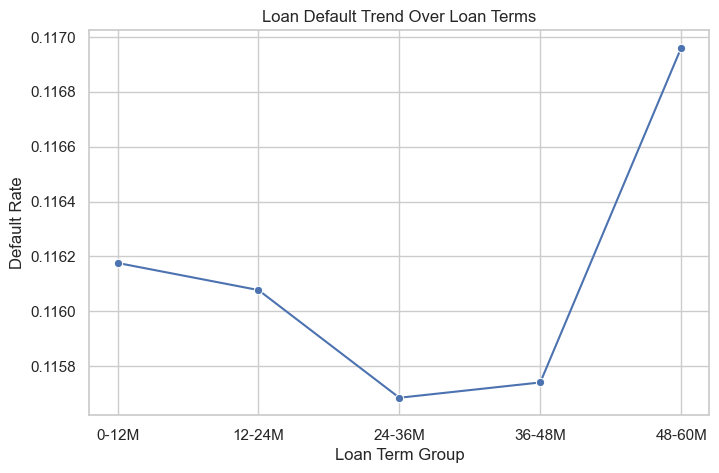

In [10]:
df['LoanTerm_Group'] = pd.cut(df['LoanTerm'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12M', '12-24M', '24-36M', '36-48M', '48-60M', '60-72M'])
default_trend = df.groupby('LoanTerm_Group')['Default'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=default_trend.index, y=default_trend.values, marker='o')
plt.title('Loan Default Trend Over Loan Terms')
plt.xlabel('Loan Term Group')
plt.ylabel('Default Rate')
plt.show()

##### 4. Comparing the performance of different MFIs in managing loan risks

In [11]:
if 'MFI' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='MFI', y='Default', data=df, estimator=lambda x: sum(x)/len(x))
    plt.title('Loan Default Rate by MFI')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No MFI column found in the dataset.")


No MFI column found in the dataset.
